In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Iot_part1.csv')

In [3]:
df.head()

,timestamp,temp,humid,co2,light,class,trip_id,fruit_cate,latitude,longitude,speed_knots,Route,temperature_C,humidity_%,dew_point_C,pressure_hPa,wind_speed_kmh,precipitation_mm,failure_scenario
0,2024-02-01 22:25:52+00:00,24.944977,89.257717,350.970178,20.473861,Good,TRIP_00030,Banana,10.74535,106.70465,0.0,VNSGN-USCHI,23.9,89.0,22.0,1012.3,8.4,0.0,GOOD
1,2024-02-01 22:35:52+00:00,24.930127,88.937926,351.754231,17.989037,Good,TRIP_00030,Banana,10.74535,106.70465,0.0,VNSGN-USCHI,23.9,89.0,22.0,1012.3,8.4,0.0,GOOD
2,2024-02-01 22:45:52+00:00,25.082836,88.535408,352.571613,20.079832,Good,TRIP_00030,Banana,10.74535,106.70465,0.0,VNSGN-USCHI,23.9,89.0,22.0,1012.3,8.4,0.0,GOOD
3,2024-02-01 22:55:52+00:00,25.067485,88.786104,353.393199,19.468183,Good,TRIP_00030,Banana,10.74535,106.70465,0.0,VNSGN-USCHI,23.9,89.0,22.0,1012.3,8.4,0.0,GOOD
4,2024-02-01 23:05:52+00:00,25.109032,88.616012,354.223067,20.142465,Good,TRIP_00030,Banana,10.74535,106.70465,0.0,VNSGN-USCHI,23.9,89.0,22.0,1012.3,8.4,0.0,GOOD


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9010878 entries, 0 to 9010877
Data columns (total 19 columns):
 #   Column            Dtype  
---  ------            -----  
 0   timestamp         object 
 1   temp              float64
 2   humid             float64
 3   co2               float64
 4   light             float64
 5   class             object 
 6   trip_id           object 
 7   fruit_cate        object 
 8   latitude          float64
 9   longitude         float64
 10  speed_knots       float64
 11  Route             object 
 12  temperature_C     float64
 13  humidity_%        float64
 14  dew_point_C       float64
 15  pressure_hPa      float64
 16  wind_speed_kmh    float64
 17  precipitation_mm  float64
 18  failure_scenario  object 
dtypes: float64(13), object(6)
memory usage: 1.3+ GB


In [5]:
# Check missing values
print("Missing Values:")
print(df.isnull().sum())
print(f"\nMissing percentage:\n{(df.isnull().sum() / len(df) * 100).round(2)}%")

Missing Values:
timestamp           0
temp                0
humid               0
co2                 0
light               0
class               0
trip_id             0
fruit_cate          0
latitude            0
longitude           0
speed_knots         0
Route               0
temperature_C       0
humidity_%          0
dew_point_C         0
pressure_hPa        0
wind_speed_kmh      0
precipitation_mm    0
failure_scenario    0
dtype: int64

Missing percentage:
timestamp           0.0
temp                0.0
humid               0.0
co2                 0.0
light               0.0
class               0.0
trip_id             0.0
fruit_cate          0.0
latitude            0.0
longitude           0.0
speed_knots         0.0
Route               0.0
temperature_C       0.0
humidity_%          0.0
dew_point_C         0.0
pressure_hPa        0.0
wind_speed_kmh      0.0
precipitation_mm    0.0
failure_scenario    0.0
dtype: float64%


In [6]:
# Check duplicates
print(f"\nDuplicate rows: {df.duplicated().sum()}")


Duplicate rows: 0


In [7]:
# Check for duplicate timestamps per trip
print("\nDuplicate timestamps per trip_id:")
print(df.groupby('trip_id')['timestamp'].apply(lambda x: x.duplicated().sum()))


Duplicate timestamps per trip_id:
trip_id
TRIP_00030    0
TRIP_00034    0
TRIP_00086    0
TRIP_00105    0
TRIP_00132    0
             ..
TRIP_99677    0
TRIP_99792    0
TRIP_99797    0
TRIP_99876    0
TRIP_99946    0
Name: timestamp, Length: 3000, dtype: int64


In [8]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Optimize datatypes
df['trip_id'] = df['trip_id'].astype('category')
df['fruit_cate'] = df['fruit_cate'].astype('category')
df['Route'] = df['Route'].astype('category')
df['class'] = df['class'].astype('category')
df['failure_scenario'] = df['failure_scenario'].astype('category')

# Downcast numeric columns
float_cols = df.select_dtypes(include=['float64']).columns
for col in float_cols:
    df[col] = pd.to_numeric(df[col], downcast='float')

print(f"Memory usage after optimization: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Memory usage after optimization: 567.40 MB


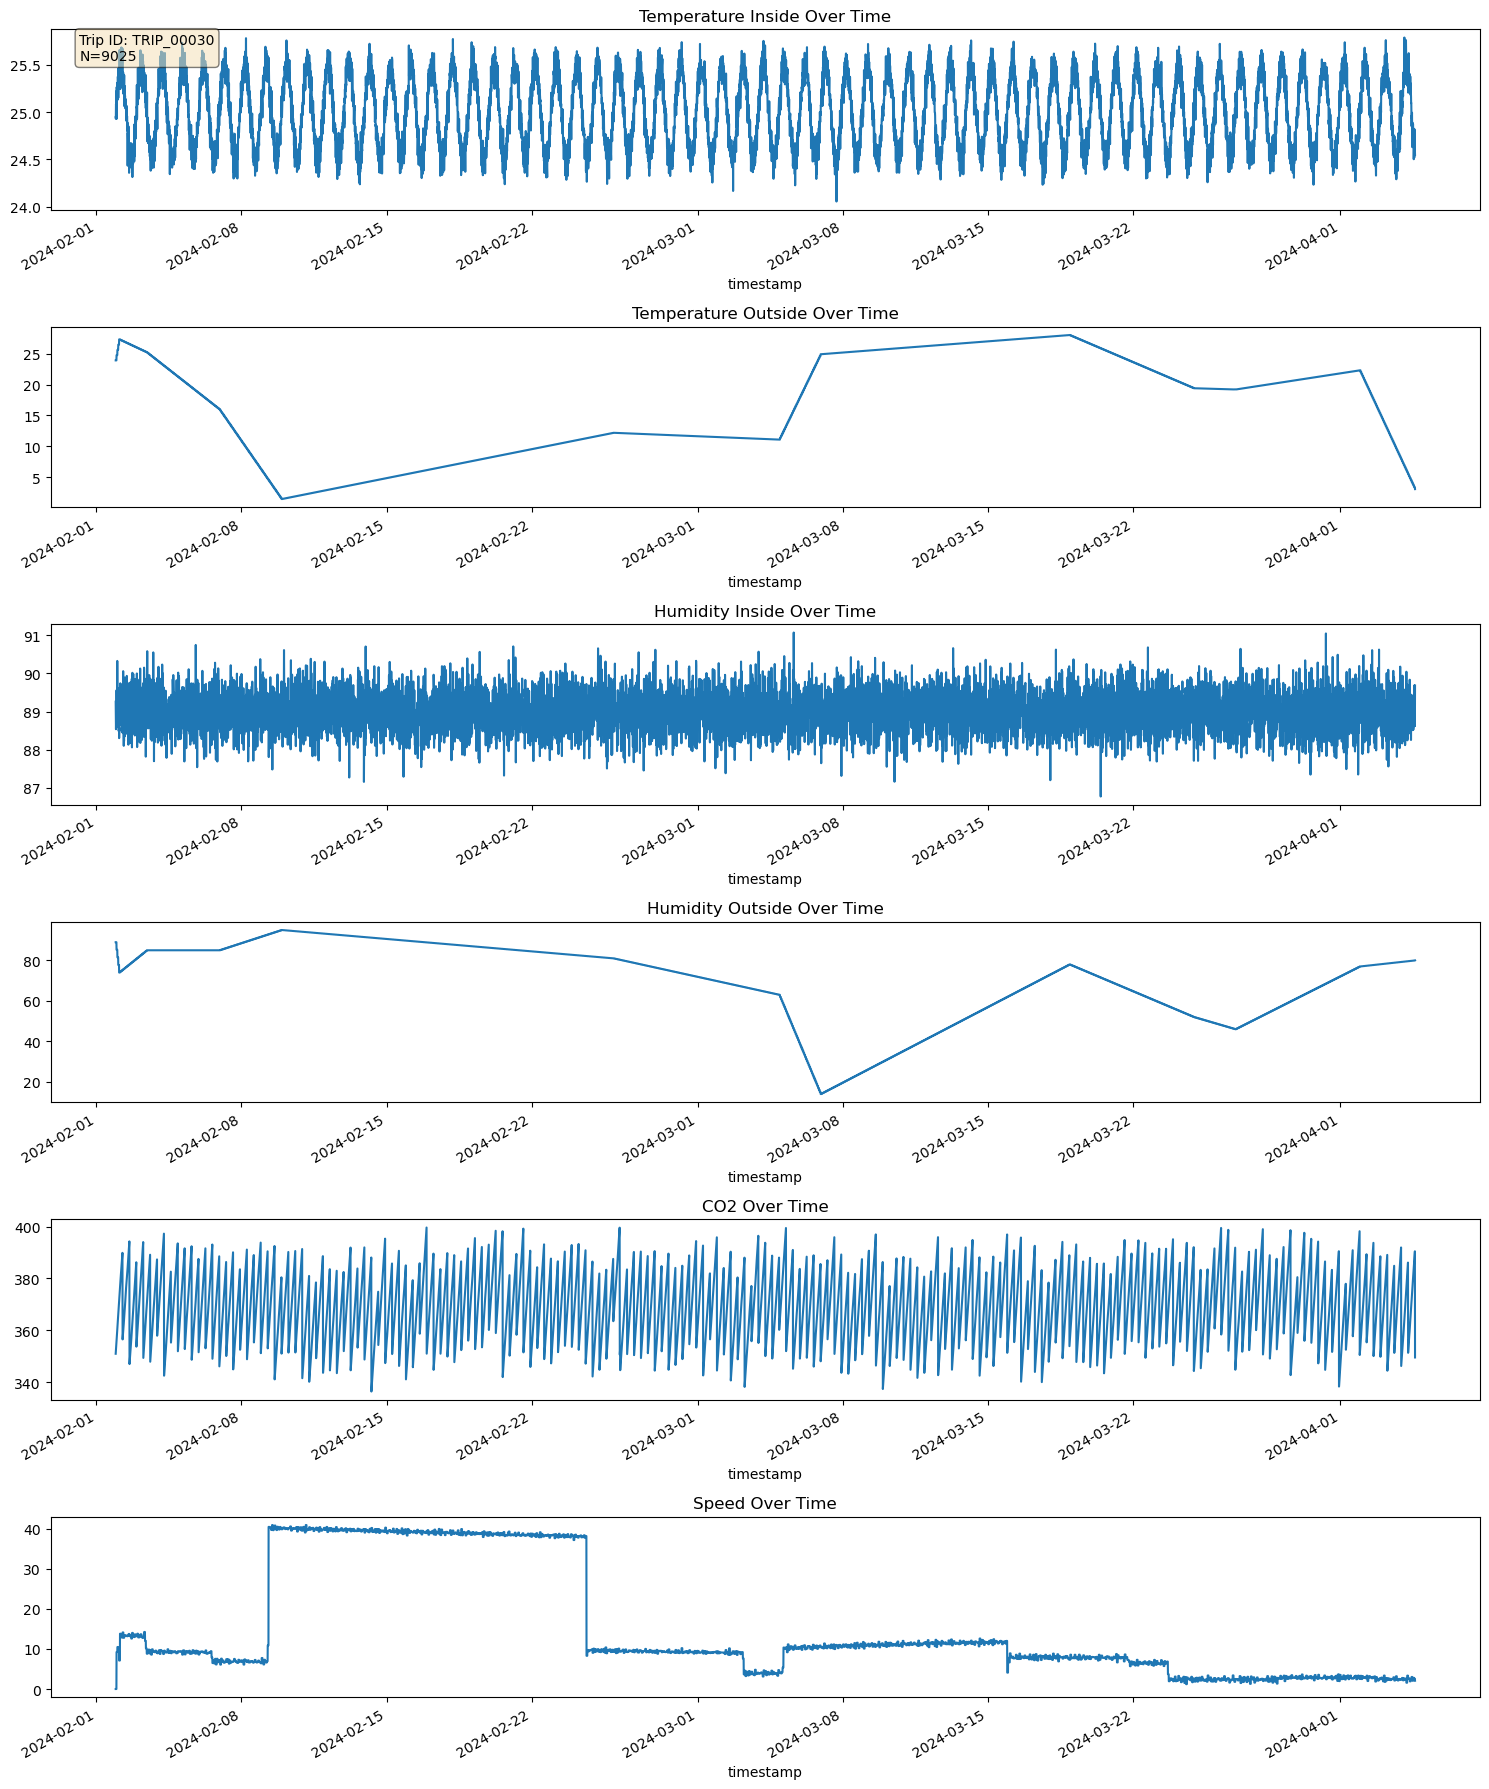

In [9]:
# Analyze temporal patterns (sample one trip for efficiency)
sample_trip = df[df['trip_id'] == df['trip_id'].iloc[0]].sort_values('timestamp')

fig, axes = plt.subplots(6, 1, figsize=(15, 18))
sample_trip.plot(x='timestamp', y='temp', ax=axes[0], title='Temperature Inside Over Time', legend=False)
sample_trip.plot(x='timestamp', y='temperature_C', ax=axes[1], title='Temperature Outside Over Time', legend=False)
sample_trip.plot(x='timestamp', y='humid', ax=axes[2], title='Humidity Inside Over Time', legend=False)
sample_trip.plot(x='timestamp', y='humidity_%', ax=axes[3], title='Humidity Outside Over Time', legend=False)
sample_trip.plot(x='timestamp', y='co2', ax=axes[4], title='CO2 Over Time', legend=False)
sample_trip.plot(x='timestamp', y='speed_knots', ax=axes[5], title='Speed Over Time', legend=False)

# Add trip info to first plot
axes[0].text(0.02, 0.98, f"Trip ID: {sample_trip['trip_id'].iloc[0]}\nN={len(sample_trip)}", 
             transform=axes[0].transAxes, fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

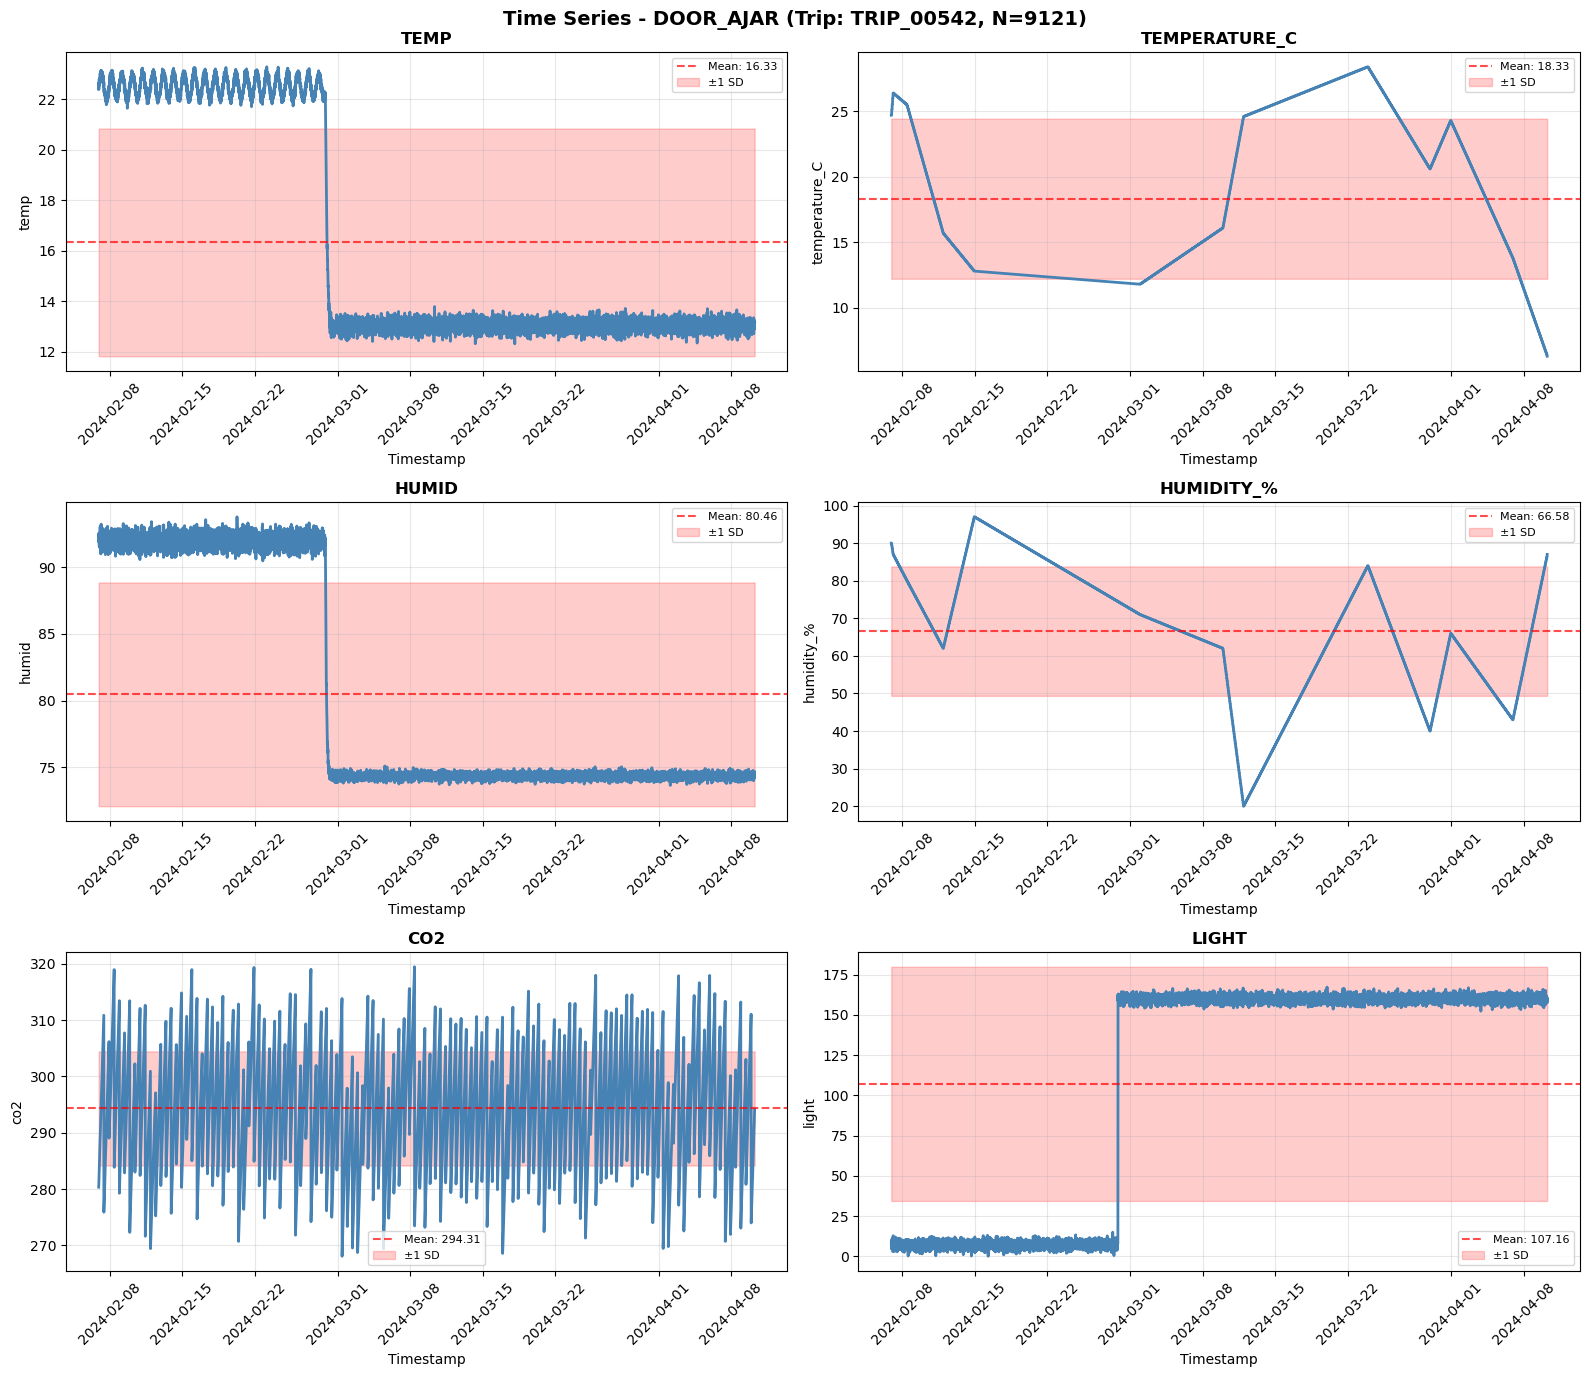

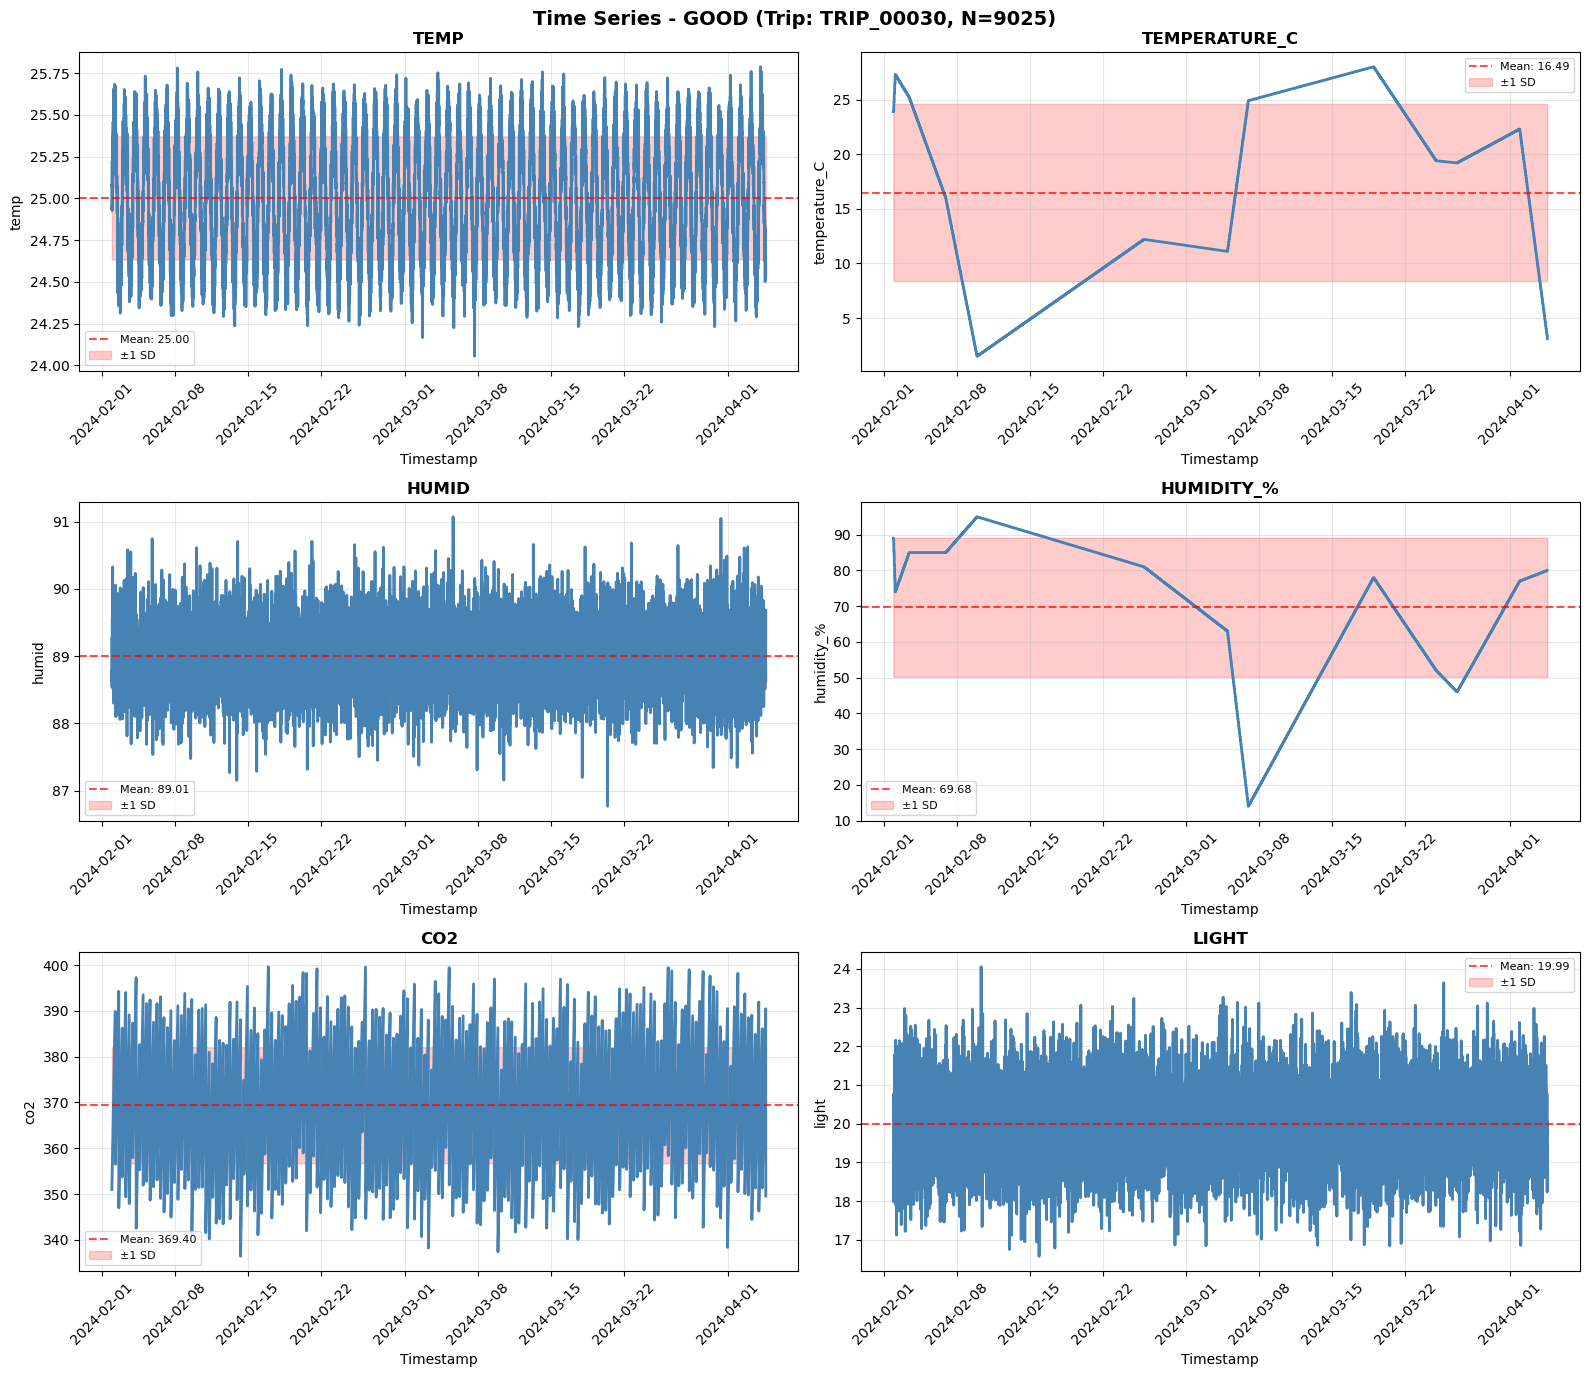

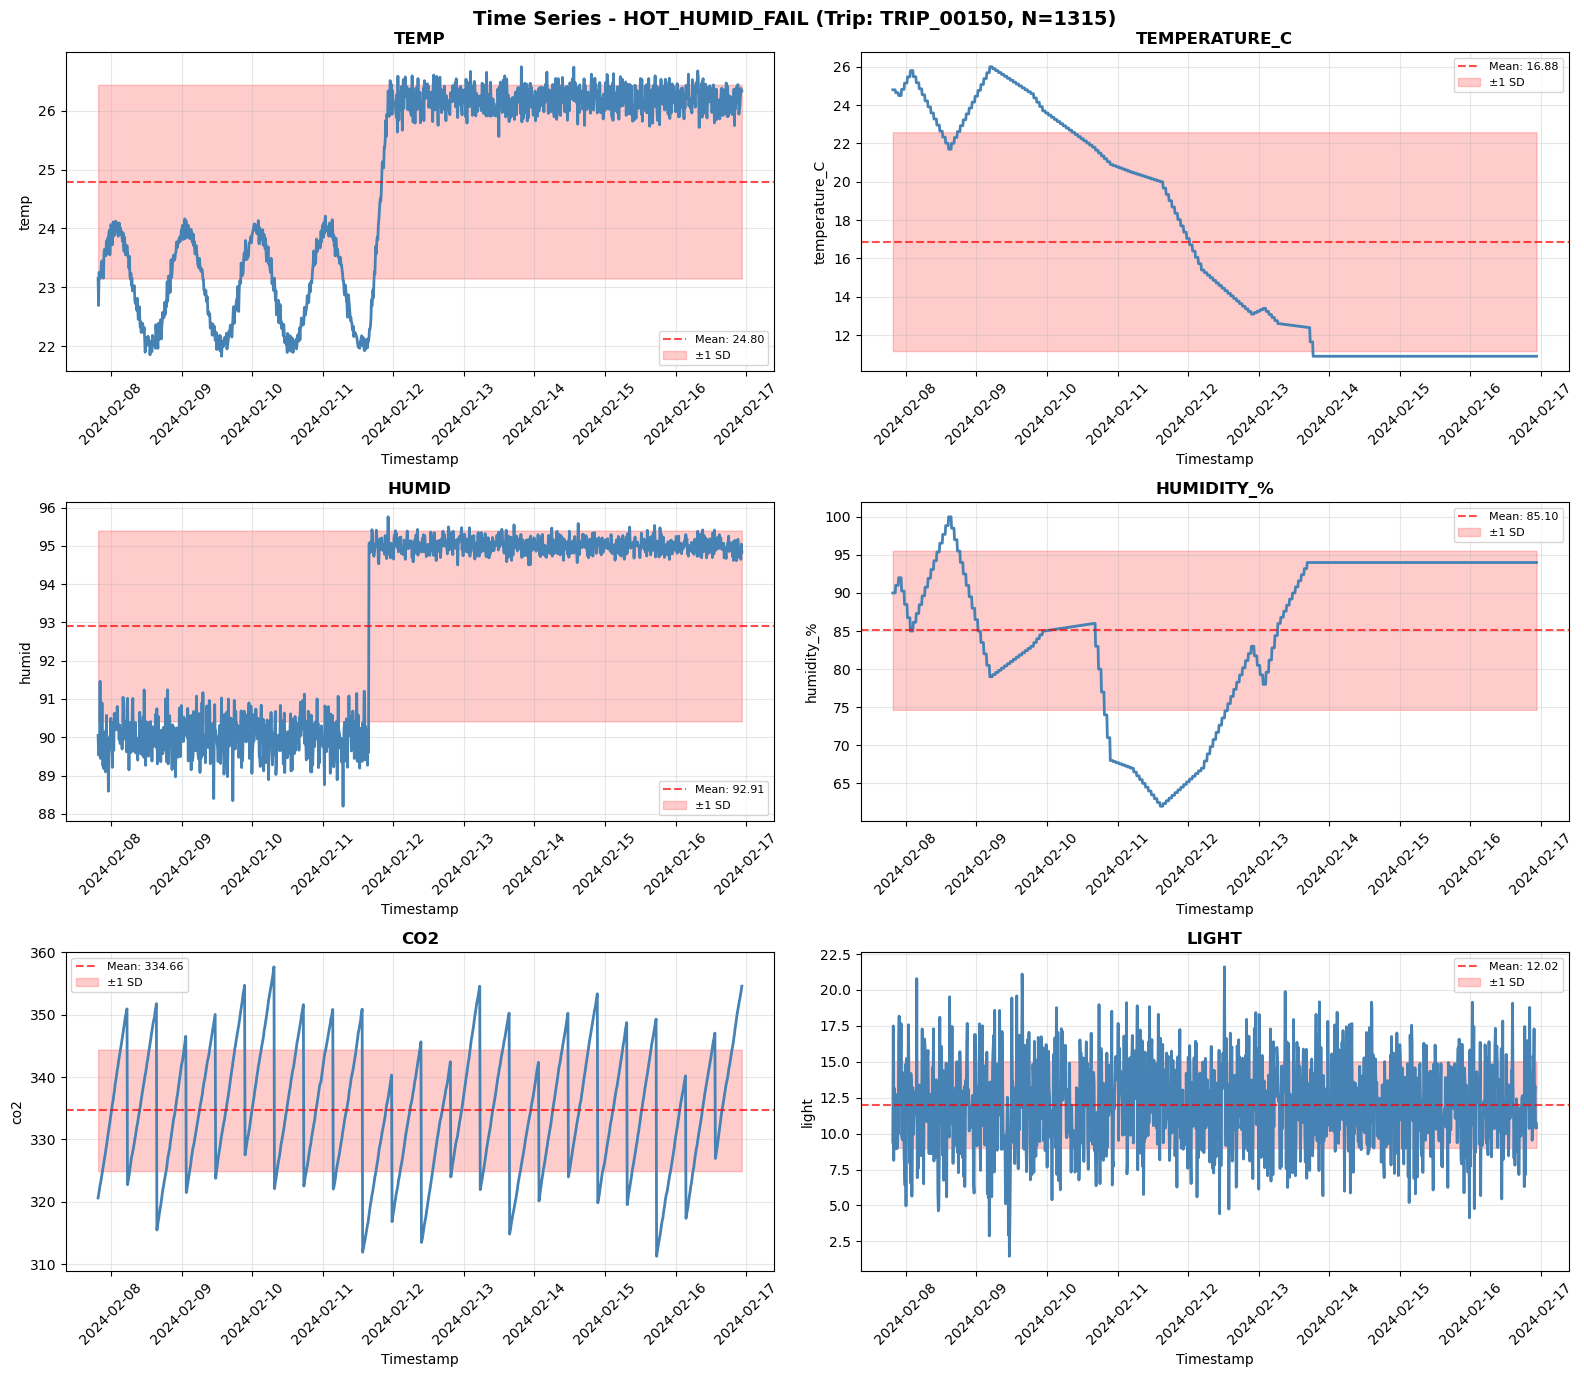

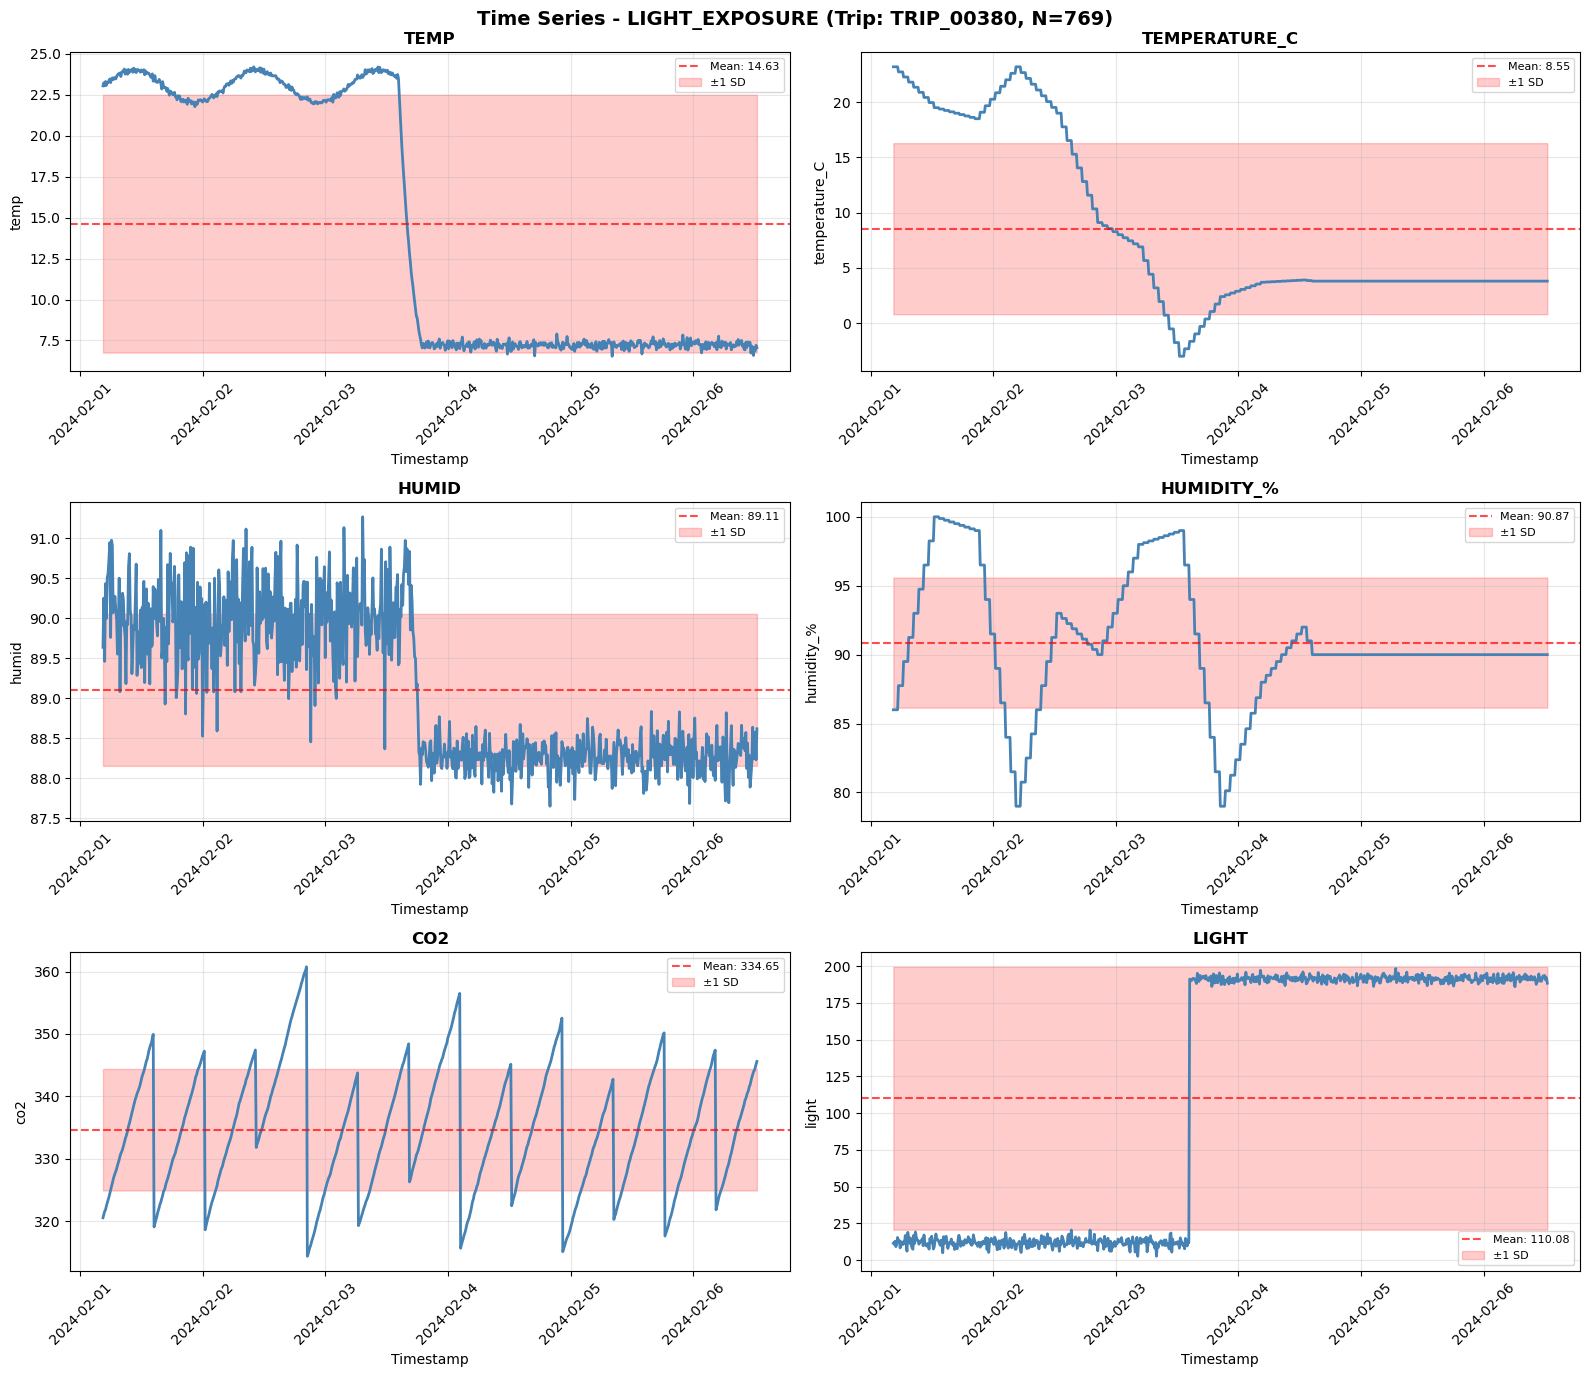

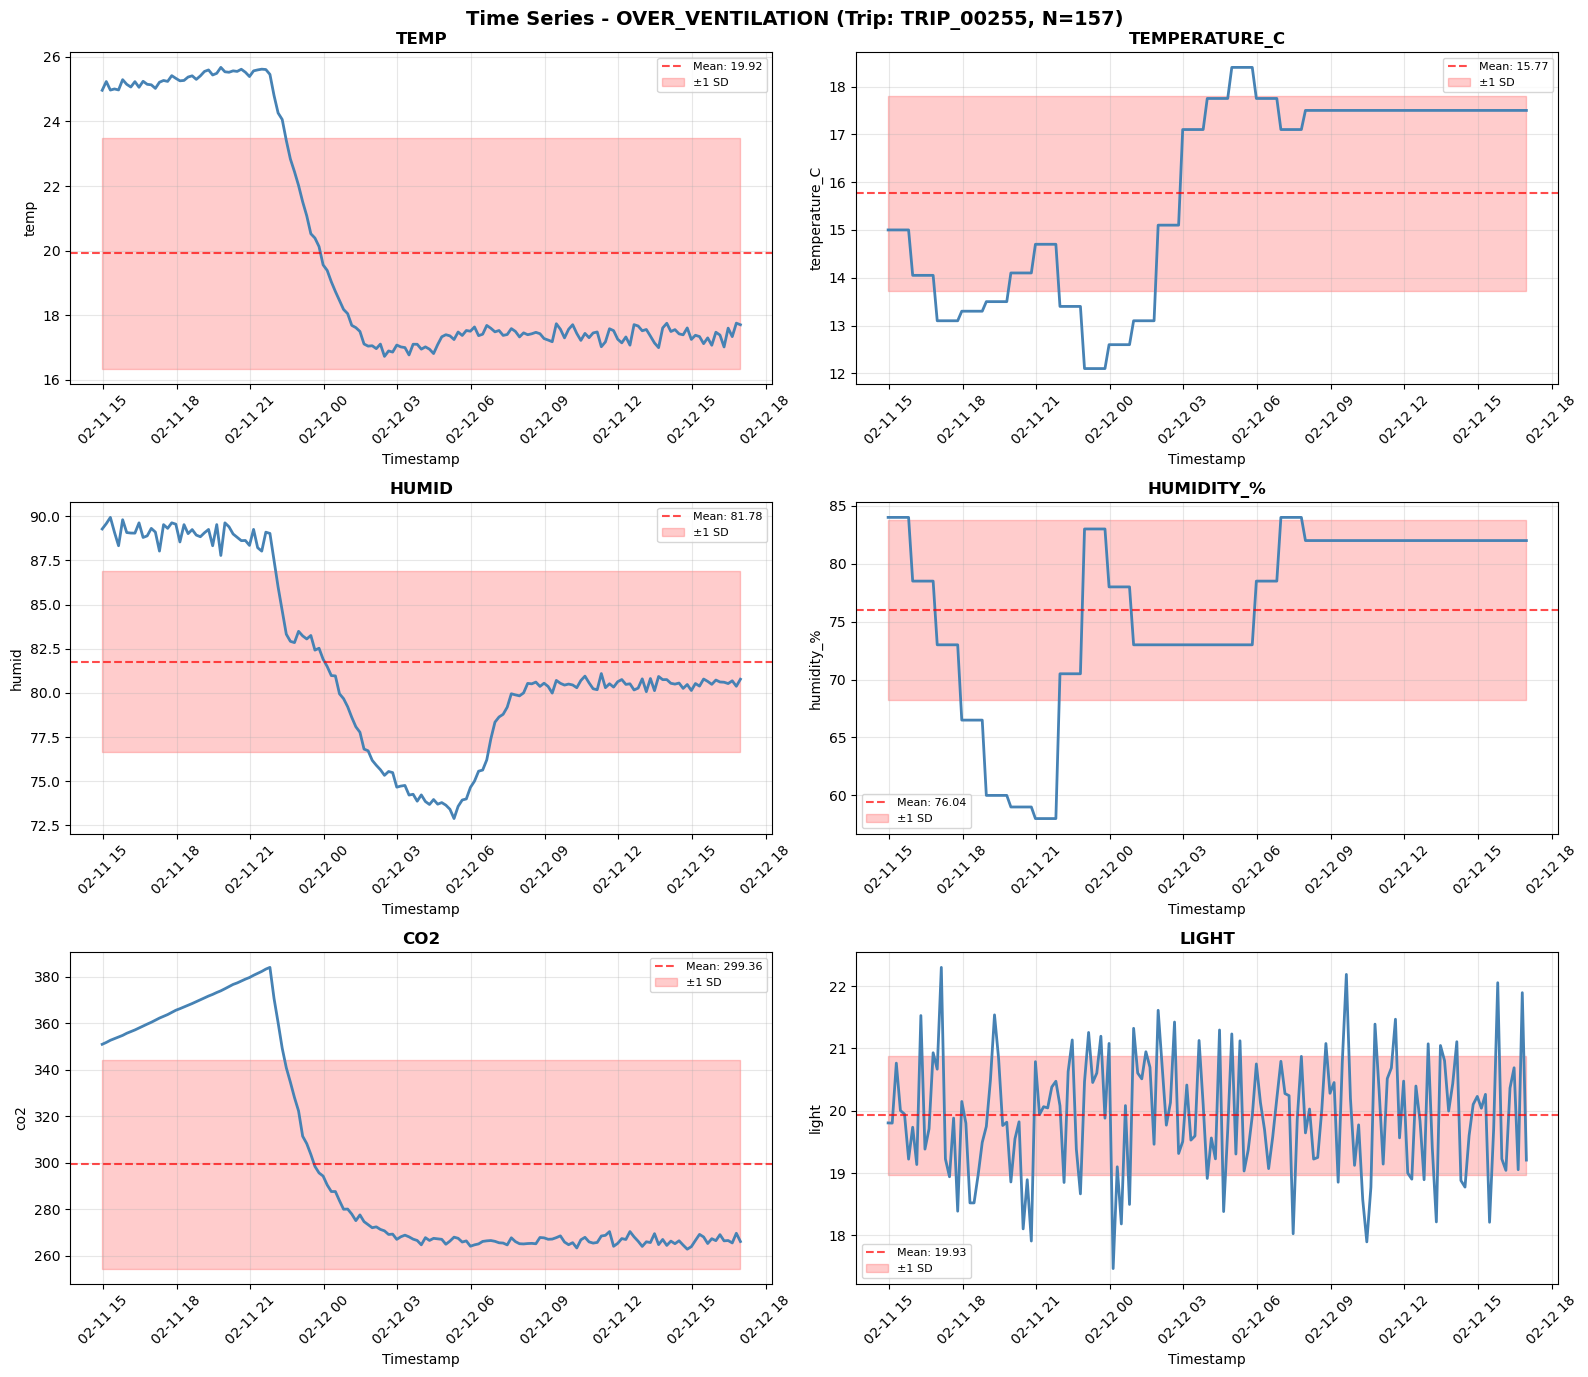

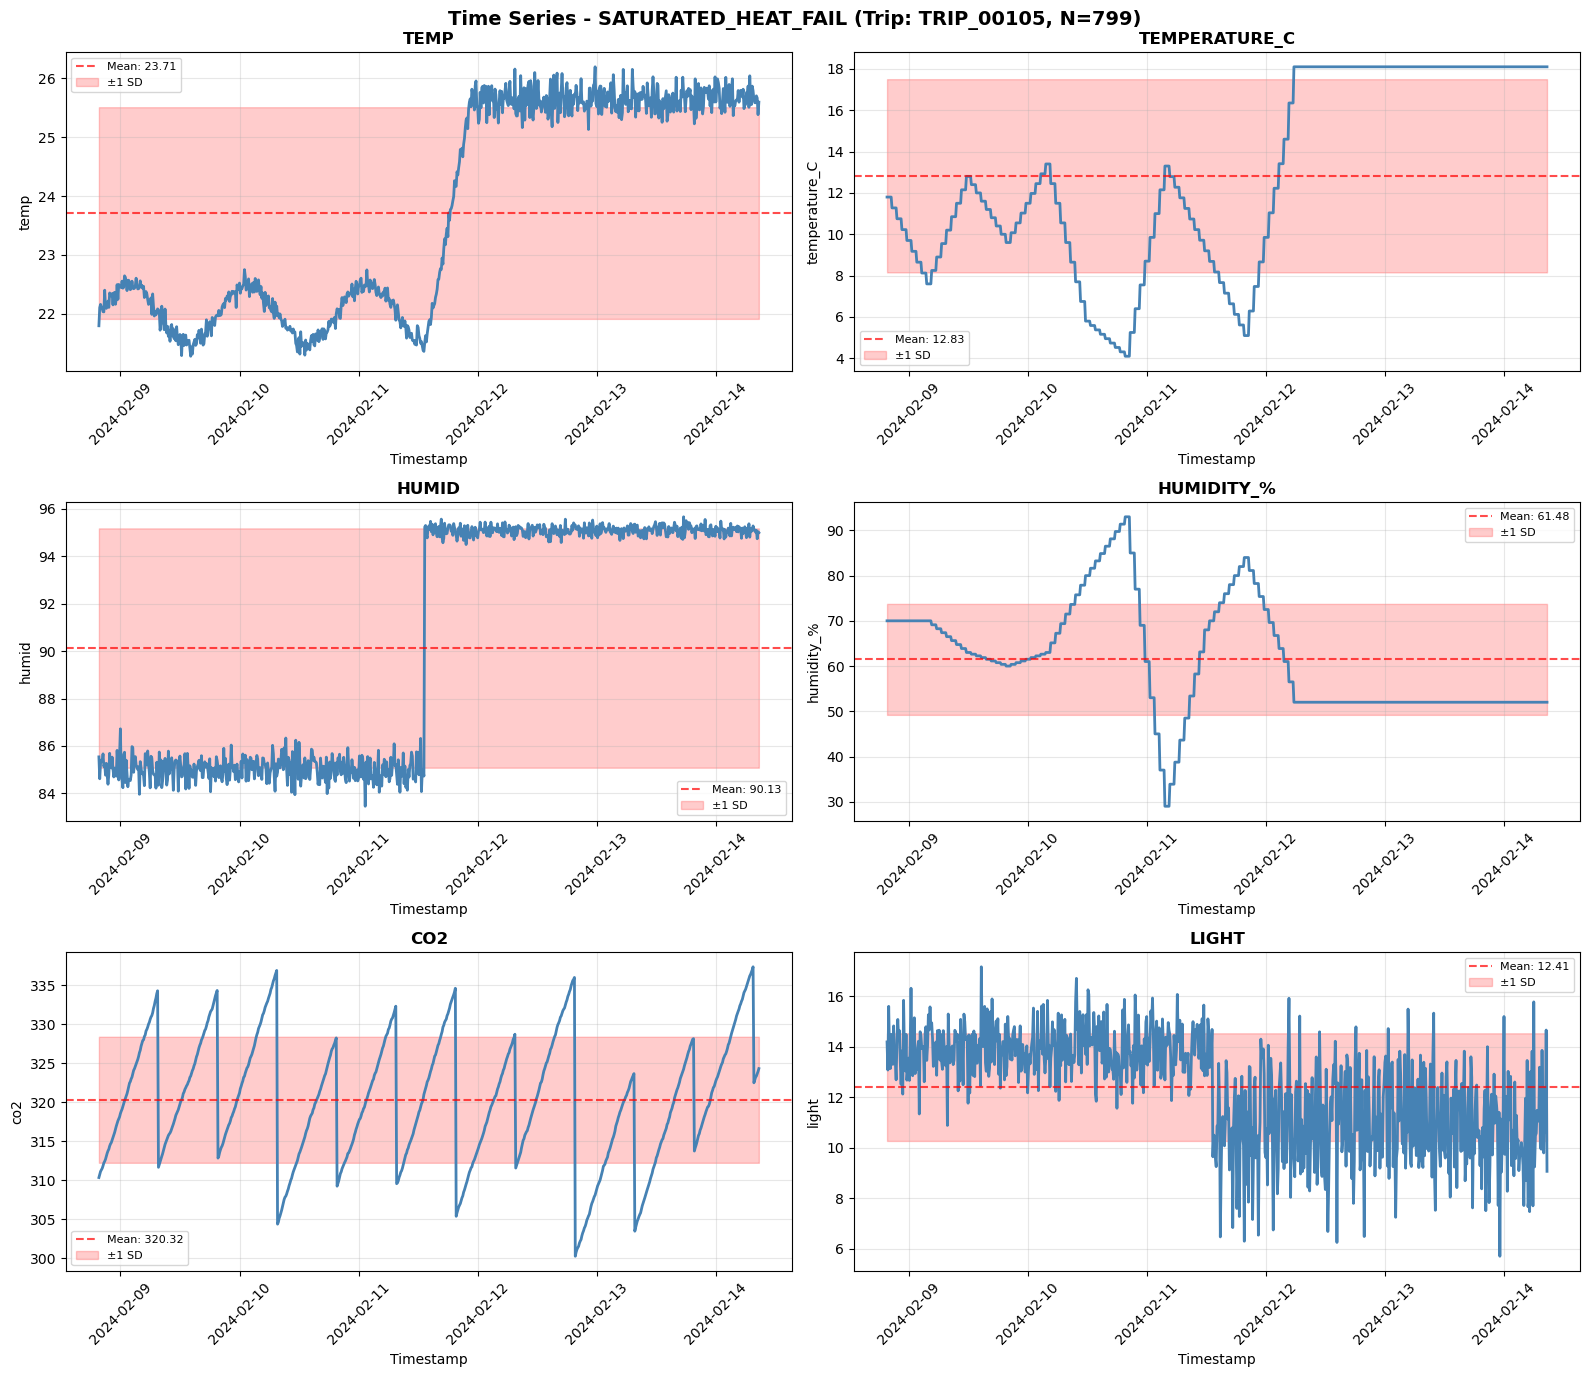

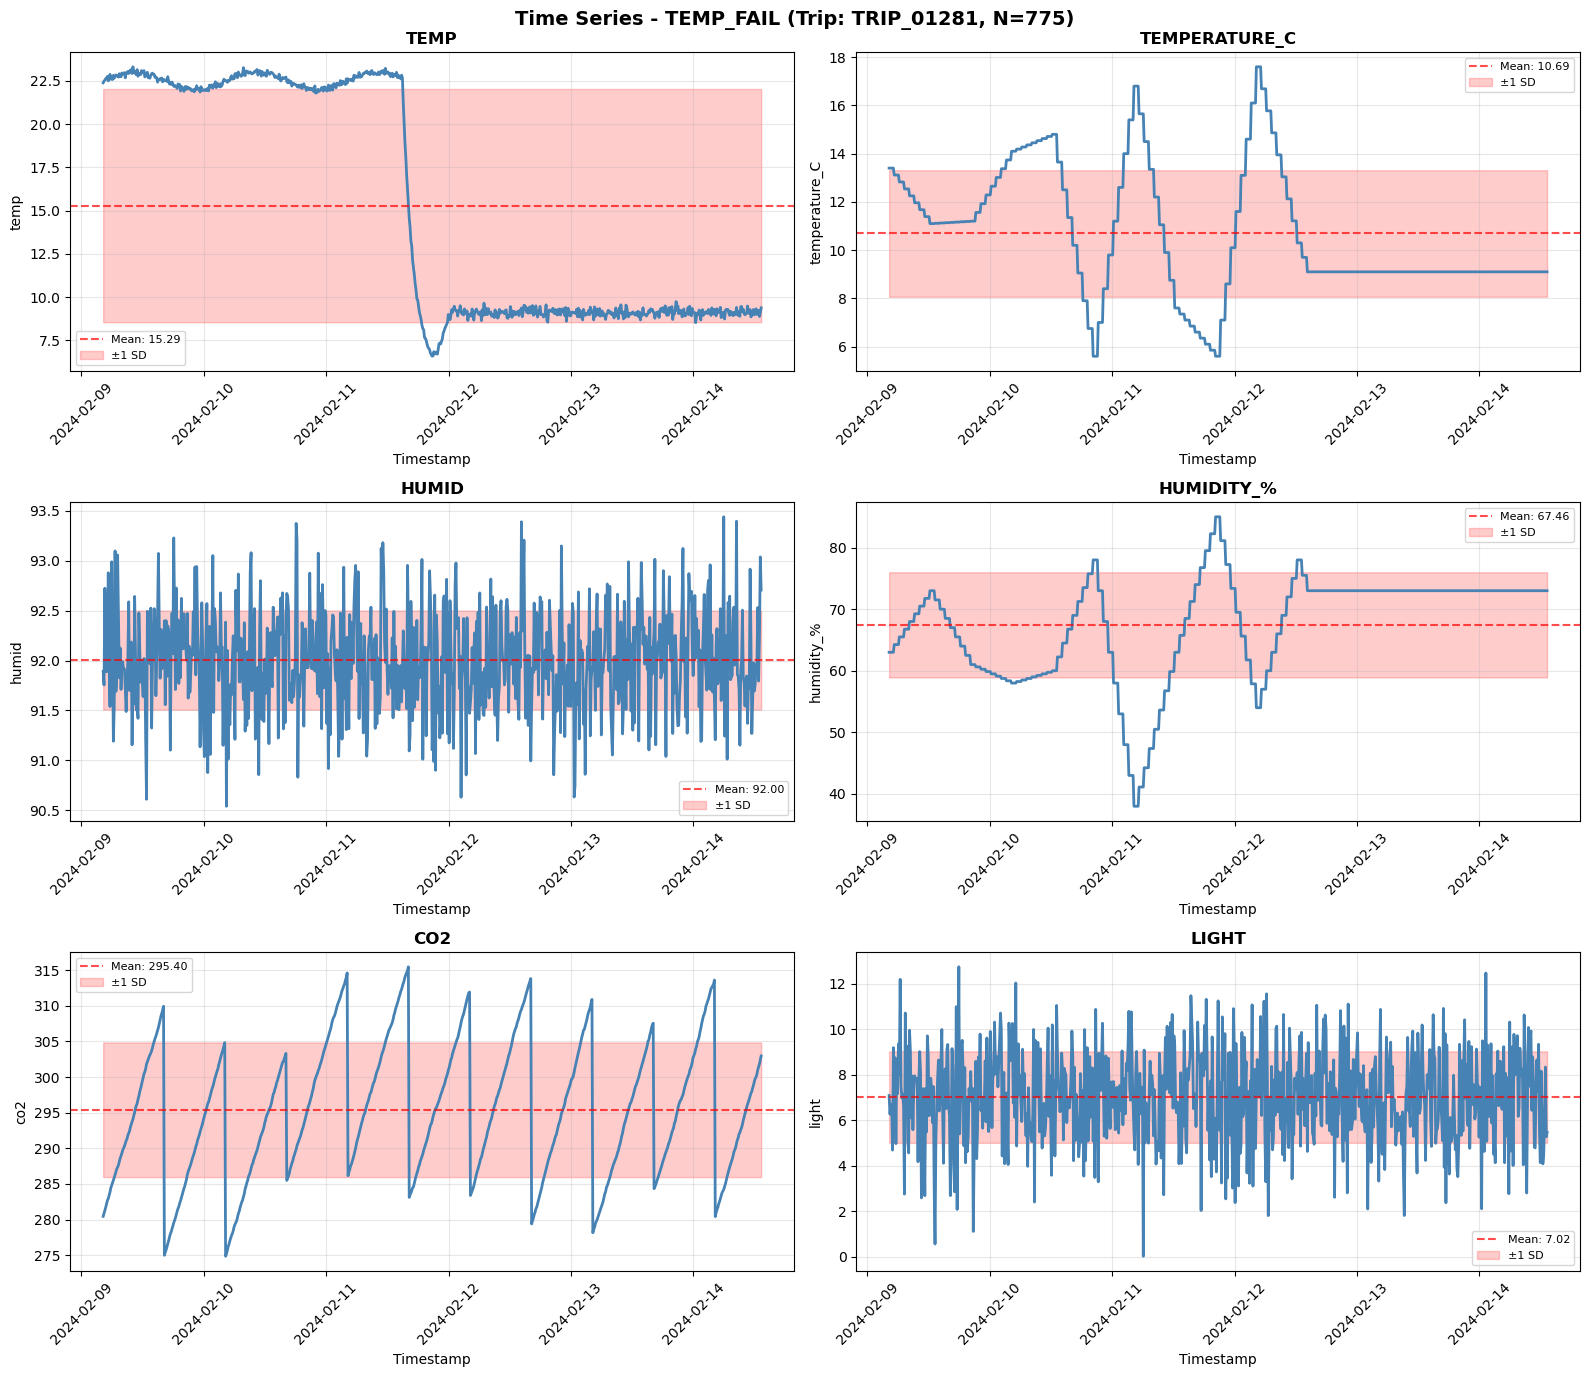

In [13]:
# Separate figure for each failure scenario
failure_scenarios = ['DOOR_AJAR', 'GOOD', 'HOT_HUMID_FAIL', 'LIGHT_EXPOSURE', 
                     'OVER_VENTILATION', 'SATURATED_HEAT_FAIL', 'TEMP_FAIL']
variables = ['temp', 'temperature_C', 'humid', 'humidity_%', 'co2', 'light']

for scenario in failure_scenarios:
    # Get first trip for this failure scenario
    scenario_data = df[df['failure_scenario'] == scenario]
    
    if len(scenario_data) > 0:
        first_trip_id = scenario_data['trip_id'].iloc[0]
        trip_data = scenario_data[scenario_data['trip_id'] == first_trip_id].sort_values('timestamp')
        
        # Create 3x2 subplot for this scenario (6 variables)
        fig, axes = plt.subplots(3, 2, figsize=(16, 14))
        fig.suptitle(f'Time Series - {scenario} (Trip: {first_trip_id}, N={len(trip_data)})', 
                     fontsize=14, fontweight='bold')
        
        # Plot each variable
        axes_flat = axes.flatten()
        for j, var in enumerate(variables):
            ax = axes_flat[j]
            ax.plot(trip_data['timestamp'], trip_data[var], linewidth=2, color='steelblue')
            ax.set_title(f'{var.upper()}', fontsize=12, fontweight='bold')
            ax.set_xlabel('Timestamp', fontsize=10)
            ax.set_ylabel(f'{var}', fontsize=10)
            ax.tick_params(axis='x', rotation=45)
            ax.grid(True, alpha=0.3)
            
            # Add statistics
            mean_val = trip_data[var].mean()
            std_val = trip_data[var].std()
            ax.axhline(y=mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
            ax.fill_between(trip_data['timestamp'], mean_val-std_val, mean_val+std_val, 
                           alpha=0.2, color='red', label=f'±1 SD')
            ax.legend(fontsize=8)
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data found for {scenario}")